In [16]:
'''
https://pypi.org/project/padasip/
https://github.com/matousc89/Python-Adaptive-Signal-Processing-Handbook
http://matousc89.github.io/padasip/
'''

import padasip as pa
# pa.filters.FilterRLS(n)
import numpy as np
import matplotlib.pylab as plt

# creation of data
N = 500
x = np.random.normal(0, 1, (N, 4)) # input matrix
v = np.random.normal(0, 0.1, N) # noise
d = 2*x[:,0] + 0.1*x[:,1] - 4*x[:,2] + 0.5*x[:,3] + v # target


print (x)
print (x.shape)
print (x[0])
print (x[0].shape)
print (v.shape)
print (v[0])
print (d.shape)

print (d)


[[ 0.11823651 -1.33420982  0.82330223  0.55950342]
 [ 1.20739175  0.32896498 -0.61215939 -0.73672462]
 [ 0.47410829 -0.09495714  1.02836805 -0.66785858]
 ...
 [-0.70795441  0.72175867 -0.28235793  0.52759061]
 [ 0.96206068 -1.90599746  0.91210848  0.18928077]
 [ 0.48979034 -0.53815209  0.06433862 -0.87597237]]
(500, 4)
[ 0.11823651 -1.33420982  0.82330223  0.55950342]
(4,)
(500,)
-0.1685289034005747
(500,)
[-3.07893408e+00  4.57621192e+00 -3.49713970e+00  5.70131153e+00
 -4.82800283e+00 -1.23217565e-01  5.28958388e+00  4.01312640e+00
  6.95521716e+00 -2.52015270e+00 -9.90711674e-01 -2.11186341e+00
 -7.90160256e-01 -1.17276615e+00 -3.34477306e+00 -4.62834599e-01
  1.04812623e+00 -2.42772043e+00 -1.43763676e+00 -9.06592598e+00
 -5.38440665e-01  7.37677951e-01  3.20202859e+00 -2.68604091e+00
  1.38776086e-01  6.44895213e+00  6.23480669e+00 -3.23136913e+00
  2.37979736e+00  2.27605793e+00  2.46256576e+00 -9.50688046e-01
  1.78568754e-03 -4.11087809e+00 -5.39218614e+00  1.13795823e+00
  3.9

(500,)


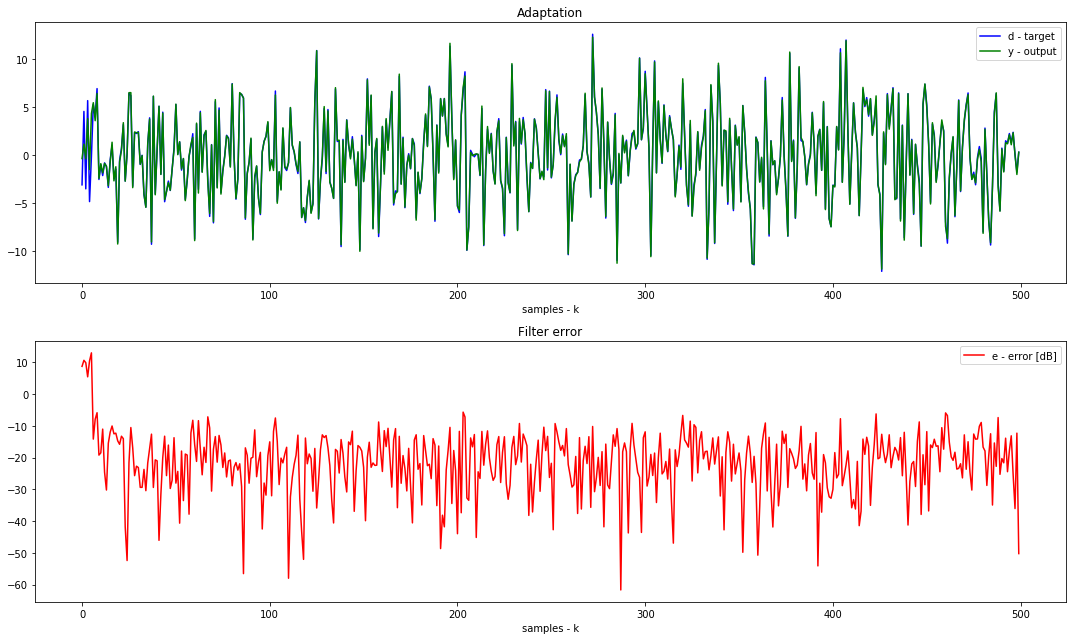

[-2.74183818e+00  3.41453421e+00 -3.13261370e+00  1.87655778e+00
 -3.34769588e+00 -4.47801434e+00 -1.95992075e-01  4.03071060e-01
  5.10433506e-01 -1.09733951e-01 -1.19115261e-01 -2.81674296e-01
  5.90531064e-02 -3.09094461e-02 -1.68859901e-01  2.52286325e-01
 -3.15472053e-01  2.37422203e-01 -2.43169928e-01  1.84193828e-01
  1.62399682e-01  2.17630848e-01 -1.99128158e-01  8.11052787e-03
  2.39430150e-03 -8.28733868e-02 -2.98306485e-01  1.42312336e-01
 -5.20722450e-02 -7.33944663e-02  6.98189750e-02 -3.40633738e-02
  3.40768177e-02 -6.53248050e-02  3.01816909e-02 -8.24885982e-02
  1.40550362e-01 -2.34587087e-01 -3.39385243e-02  9.23254759e-02
 -8.90588783e-02  4.98129952e-03  2.65367830e-02  1.00219055e-01
 -2.17927246e-01  5.21335446e-02  1.57747116e-01 -3.26877788e-02
 -4.41462824e-02  2.06282456e-01 -3.97031851e-02  6.07827816e-02
 -9.29110107e-03 -1.27076562e-01 -2.10649418e-02  1.14018046e-01
 -1.10093016e-01  1.28656021e-02 -2.44874655e-01  3.87955417e-01
  1.60699791e-01 -8.72060

In [20]:
# identification
f = pa.filters.FilterRLS(n=4, mu=0.1, w="random")
y, e, w = f.run(d, x)

print (y.shape)
# prnt_y_d = pd.

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()


print (e)

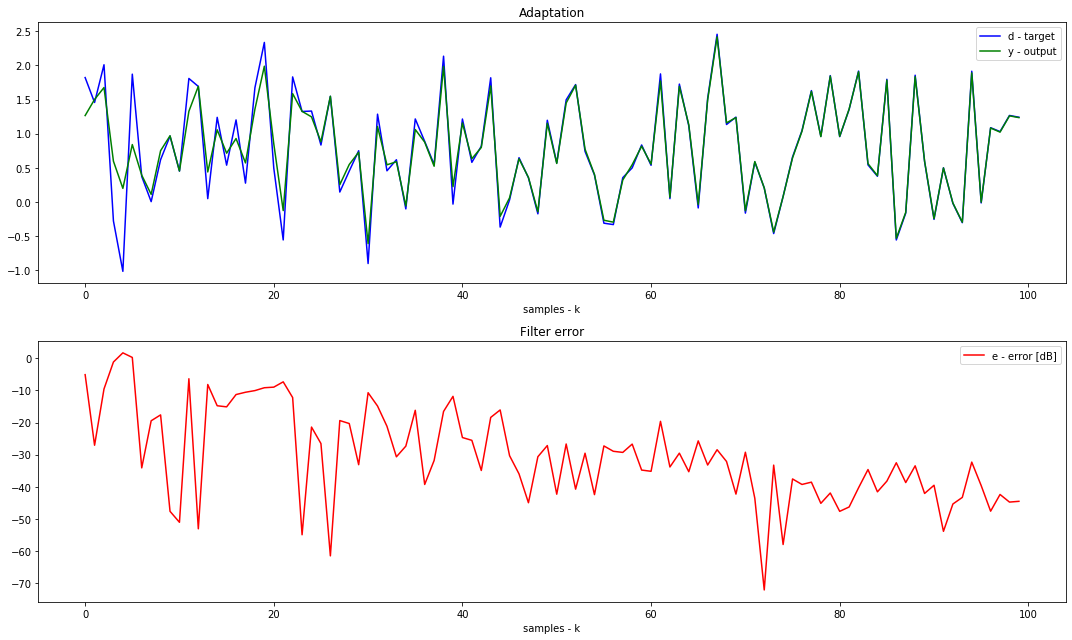

In [21]:
## An example how to filter data measured in real-time
# these two function supplement your online measurment
def measure_x():
    # it produces input vector of size 3
    x = np.random.random(3)
    return x
    
def measure_d(x):
    # meausure system output
    d = 2*x[0] + 1*x[1] - 1.5*x[2]
    return d
    
N = 100
log_d = np.zeros(N)
log_y = np.zeros(N)
filt = pa.filters.FilterRLS(3, mu=0.5)
for k in range(N):
    # measure input
    x = measure_x()
    # predict new value
    y = filt.predict(x)
    # do the important stuff with prediction output
    pass    
    # measure output
    d = measure_d(x)
    # update filter
    filt.adapt(d, x)
    # log values
    log_d[k] = d
    log_y[k] = y
    
### show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(log_d,"b", label="d - target")
plt.plot(log_y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
plt.legend(); plt.tight_layout(); plt.show()